In [12]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn import metrics
import matplotlib.pyplot as plt
from functools import reduce
import math
from collections import Counter

In [13]:
import csv

columns_header = ['id', 'userId', 'createdAt', 'text', 'longitude', 'latitude', 'placeId',
                  'inReplyTo', 'source', 'truncated', 'placeLatitude', 'placeLongitude', 'sourceName', 'sourceUrl',
                 'userName', 'screenName', 'followersCount', 'friendsCount', 'statusesCount',
                 'userLocation']
filename = os.path.join('data','sample.tsv')
df = pd.read_csv(filename, sep="\t",encoding='utf-8',  quoting=csv.QUOTE_NONE, names=columns_header)

df.shape

(9999, 20)

In [14]:
df

,id,userId,createdAt,text,longitude,latitude,placeId,inReplyTo,source,truncated,placeLatitude,placeLongitude,sourceName,sourceUrl,userName,screenName,followersCount,friendsCount,statusesCount,userLocation
0,776522983837954049,735449229028675584,2016-09-15 20:48:01,se lo dici tu... https://t.co/x7Qm1VHBKL,\N,\N,51c0e6b24c64e54e,\N,1.0,NaN,46.0027,8.96044,Twitter for iPhone,http://twitter.com/#!/download/iphone,plvtone filiae.,hazel_chb,146,110.0,28621.0,Earleen.
1,776523000636203010,2741685639,2016-09-15 20:48:05,https://t.co/noYrTnqmg9,\N,\N,4e7c21fd2af027c6,\N,1.0,NaN,46.8131,8.22414,Twitter for iPhone,http://twitter.com/#!/download/iphone,samara,letisieg,755,2037.0,3771.0,Suisse
2,776523045200691200,435239151,2016-09-15 20:48:15,@BesacTof @Leonid_CCCP Tu dois t'engager en si...,\N,\N,12eb9b254faf37a3,776522113859608576,5.0,NaN,47.201,5.94082,Twitter for Android,http://twitter.com/download/android,lebrübrü❤,lebrubru,811,595.0,30191.0,Fontain
3,776523058404290560,503244217,2016-09-15 20:48:18,@Mno0or_Abyat اشوف مظاهرات على قانون العمل الج...,\N,\N,30bcd7f767b4041e,776521597515624448,1.0,NaN,45.8011,6.16552,Twitter for iPhone,http://twitter.com/#!/download/iphone,عبدالله القنيص,bingnais,28433,417.0,12262.0,Shargeyah
4,776523058504925185,452805259,2016-09-15 20:48:18,Greek night #geneve (@ Emilios in Genève) http...,6.14414,46.1966,c3a6437e1b1a726d,\N,3.0,NaN,46.2048,6.14319,foursquare,http://foursquare.com,Alkan Şenli,Alkanoli,204,172.0,3390.0,İstanbul/Burgazada
5,776523071025012736,16416746,2016-09-15 20:48:21,@gregorypons #BusinessMontresVision https://t....,\N,\N,c3a6437e1b1a726d,776520907107995652,18777.0,NaN,46.2048,6.14319,Twitter Web Client,http://twitter.com,Gregory PONS,gregorypons,2398,305.0,14917.0,Geneva + watchmaking planet
6,776523092768219137,735449229028675584,2016-09-15 20:48:27,dillo https://t.co/hScjeZbi4c,\N,\N,51c0e6b24c64e54e,\N,1.0,NaN,46.0027,8.96044,Twitter for iPhone,http://twitter.com/#!/download/iphone,plvtone filiae.,hazel_chb,146,110.0,28621.0,Earleen.
7,776523105007177728,2442105406,2016-09-15 20:48:29,Miii le voci nere.. Che meraviglia.. #XF10,\N,\N,3f0b5e0668b2fd3c,\N,5.0,NaN,45.8865,9.64878,Twitter for Android,http://twitter.com/download/android,Roberta Perani,robertabg72,971,1753.0,8181.0,\N
8,776523126729474048,101489921,2016-09-15 20:48:35,@Manu_Aka_Manny Sorry,\N,\N,9b05f50adb666c0e,776520877613735936,1.0,NaN,45.8327,8.77107,Twitter for iPhone,http://twitter.com/#!/download/iphone,Martina Ferraiuolo,martiferraiuolo,530,308.0,9610.0,"Varese, Italy"
9,776523134409244673,715791830294650880,2016-09-15 20:48:37,Je veut ca https://t.co/NZpSScxQ70,\N,\N,3f056fa44e682001,\N,5.0,NaN,47.717,7.3448,Twitter for Android,http://twitter.com/download/android,analslut,doggyboynude,1206,2503.0,815.0,france


In [42]:
df.source.unique().size
df.id.unique().size
df.shape

(9999, 20)

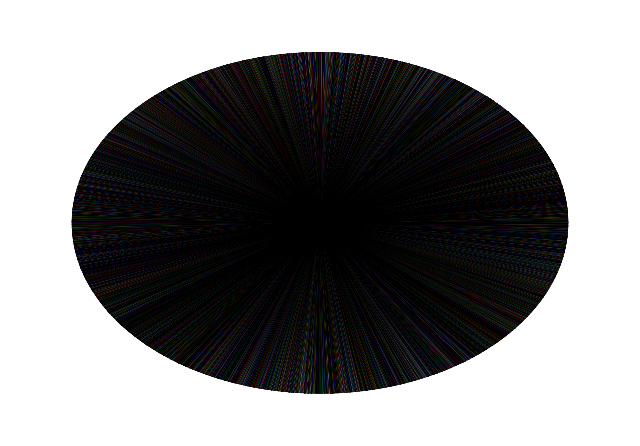

In [44]:
# plt.plot(df.source)
arr = df.source.fillna(0)
arr = arr.astype(int)
plt.pie(arr)
plt.show()